# Project

**Description:**

This is a template based off of the excellent datascience guide available [here](https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy). This notebook contains useful functions for general use case in solving Kaggle competitions, building simple prediction models, etc...

This notebook follows these important steps that any project should abide by:
1. Define the problem
2. Gather the data
3. Prepare the data (Data wrangling)
4. Exploratory Data Analysis (EDA)
5. Model data
6. Validate and implement the model
7. Optimize and Strategize

### Imports

In [2]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib
import scipy
import scipy.stats as stats
import sklearn

print(f"Pandas version {pd.__version__}")

print(f"Numpy version {np.__version__}")

print(f"Scipy version {scipy.__version__}")

print(f"Scikit-learn version {sklearn.__version__}")

print(f"Matplotlib version {matplotlib.__version__}")


# Common Model Algorithms
from sklearn import linear_model, svm, naive_bayes, ensemble, gaussian_process, neighbors, tree, decomposition, cluster, discriminant_analysis
import xgboost as xgb
import lightgbm as lgbm
import catboost as catboost

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8


Pandas version 2.2.0
Numpy version 1.26.4
Scipy version 1.12.0
Scikit-learn version 1.4.1.post1
Matplotlib version 3.8.3


## Data preparation

In [3]:
# Import data in training, testing and validation sets
location_dataset = "Titanic Disaster/data/train.csv"
location_dataset_val = "Titanic Disaster/data/test.csv"

data_raw = pd.read_csv(location_dataset)
data_val_raw = pd.read_csv(location_dataset_val)

# We copy the data and package it to pass by reference
data1 = data_raw.copy(deep=True)
data_val = data_val_raw.copy(deep=True)

# Preview data
display(data_raw.info())
display(data_raw.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
656,657,0,3,"Radeff, Mr. Alexander",male,NaN,0,0,349223,7.8958,NaN,S
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
221,222,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4000,NaN,C
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C


### Cleaning

**Next steps**: 4 C's of data cleaning:
- Correcting (fix aberrant values)
- Completing (impute missing values using a predefined methodology which can be improved/complexified in later iterations)
- Creating (create new features if they can provide new signal)
- Converting (choose an encoding for categorical and date or currency formats)

In [4]:
print("Train columns with null values:\n", data1.isnull().sum())
print("-" * 10)

print("Test/Validation columns with null values:\n", data_val.isnull().sum())
print("-" * 10)

data_raw.describe(include="all")

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
#### CORRECTING

# Usually nothing to do on Kaggle datasets which are rather clean

In [6]:
#### COMPLETING
for dataset in [data1, data_val]:
    # complete missing age with median, embarked with mode, missing fare with median
    dataset.fillna(
        {"Age": dataset["Age"].median(), "Embarked": dataset["Embarked"].mode()[0], "Fare": dataset["Fare"].median()},
        inplace=True,
    )


# Delete the cabin feature as well as the possibly unique identifiers
drop_columns = ["PassengerId", "Cabin", "Ticket"]
for dataset in [data1, data_val]:
    dataset.drop(drop_columns, axis=1, inplace=True)

print(data1.isnull().sum())
print("-" * 10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [7]:
#### CREATING
for dataset in [data1, data_val]:
    # Discrete variables
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
    dataset["IsAlone"] = dataset["FamilySize"] == 1

    dataset["Title"] = dataset["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

    # Continuous variables (qcut = frequency bins, cut = value bins)
    dataset["FareBin"] = pd.qcut(dataset["Fare"], 4)
    dataset["AgeBin"] = pd.cut(dataset["Age"].astype("int"), 5)

# Cleanup uncommon titles
print(data1["Title"].value_counts())
print("-" * 10)
threshold_count = 10
title_names = data1["Title"].value_counts() < threshold_count
data1["Title"] = data1["Title"].apply(lambda x: "Misc" if title_names[x] else x)
print(data1["Title"].value_counts())
print("-" * 10)

# preview data again
data1.info()
data_val.info()
data1.sample(10)

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64
----------
Title
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: count, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
678,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,46.9000,S,8,False,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
464,0,3,"Maisner, Mr. Simon",male,28.0,0,0,8.0500,S,1,True,Mr,"(7.91, 14.454]","(16.0, 32.0]"
635,1,2,"Davis, Miss. Mary",female,28.0,0,0,13.0000,S,1,True,Miss,"(7.91, 14.454]","(16.0, 32.0]"
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q,6,False,Mrs,"(14.454, 31.0]","(32.0, 48.0]"
706,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,13.5000,S,1,True,Mrs,"(7.91, 14.454]","(32.0, 48.0]"
570,1,2,"Harris, Mr. George",male,62.0,0,0,10.5000,S,1,True,Mr,"(7.91, 14.454]","(48.0, 64.0]"
860,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,14.1083,S,3,False,Mr,"(7.91, 14.454]","(32.0, 48.0]"
524,0,3,"Kassem, Mr. Fared",male,28.0,0,0,7.2292,C,1,True,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
322,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,12.3500,Q,1,True,Miss,"(7.91, 14.454]","(16.0, 32.0]"
516,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,10.5000,S,1,True,Mrs,"(7.91, 14.454]","(32.0, 48.0]"


In [8]:
# Useful helper functions for the converting step

def onehot_encode(label, train, test, oh_encoder):
    # convert
    train_col = train[label].to_numpy().reshape(-1, 1)
    test_col = test[label].to_numpy().reshape(-1, 1)
    # fit
    oh_encoder.fit(train_col)
    # transform
    train_col_oh = oh_encoder.transform(train_col)
    test_col_oh = oh_encoder.transform(test_col)
    # rename
    train_col_oh.columns = oh_encoder.get_feature_names_out([label])
    test_col_oh.columns = oh_encoder.get_feature_names_out([label])
    # concatenate
    return pd.concat([train, train_col_oh], axis=1), pd.concat([test, test_col_oh], axis=1)

def ordinal_encode(label, train, test, od_encoder):
    # convert
    train_col = train[label].to_numpy().reshape(-1, 1)
    test_col = test[label].to_numpy().reshape(-1, 1)
    # fit
    od_encoder.fit(train_col)
    # transform
    train_col_od = od_encoder.transform(train_col)
    test_col_od = od_encoder.transform(test_col)
    # rename
    train_col_od.columns = [label + "_Code"]
    test_col_od.columns = [label + "_Code"]
    # concatenate
    return pd.concat([train, train_col_od], axis=1), pd.concat([test, test_col_od], axis=1)

def minmax_scale(label, train, test, minmax_scaler):
    # convert
    train_col = train[label].to_numpy().reshape(-1, 1)
    test_col = test[label].to_numpy().reshape(-1, 1)
    # fit
    minmax_scaler.fit(train_col)
    # transform
    train_col_minmax = minmax_scaler.transform(train_col)
    test_col_minmax = minmax_scaler.transform(test_col)
    # rename
    train_col_minmax.columns = [label + "_MinMaxScaled"]
    test_col_minmax.columns = [label + "_MinMaxScaled"]
    # concatenate
    return pd.concat([train, train_col_minmax], axis=1), pd.concat([test, test_col_minmax], axis=1)

def std_scale(label, train, test, std_scaler):
    # convert
    train_col = train[label].to_numpy().reshape(-1, 1)
    test_col = test[label].to_numpy().reshape(-1, 1)
    # fit
    std_scaler.fit(train_col)
    # transform
    train_col_std = std_scaler.transform(train_col)
    test_col_std = std_scaler.transform(test_col)
    # rename
    train_col_std.columns = [label + "_StdScaled"]
    test_col_std.columns = [label + "_StdScaled"]
    # concatenate
    return pd.concat([train, train_col_std], axis=1), pd.concat([test, test_col_std], axis=1)

def code_data(train, test, encoders, features):
    # Label encoding
    for label in features["ordinal"]:
        train, test = ordinal_encode(label, train, test, encoders["ordinal"])

    # One-hot encoding
    for label in features["onehot"]:
        train, test = onehot_encode(label, train, test, encoders["onehot"])
    
    # Minmax scaler
    for label in features["minmax"]:
        train, test = minmax_scale(label, train, test, encoders["minmax"])
        
    # Std scaler
    for label in features["std"]:
        train, test = std_scale(label, train, test, encoders["std"])
        
    return train, test


In [9]:
#### CONVERTING

# A crucial step here is to avoid leakage between the test and training sets. So various encoders should be fit on the training data only.

label_features = ["Sex", "Embarked", "Title", "AgeBin", "FareBin"]
oh_features = ["Sex", "Embarked", "Title"]
standard_scale_features = []
minmax_scale_features = []

# Label and one-hot encoding
od_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
oh_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
oh_encoder.set_output(transform="pandas")
od_encoder.set_output(transform="pandas")

# Scalers
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()
minmax_scaler.set_output(transform="pandas")
std_scaler.set_output(transform="pandas")

# We combine all these into objects for easier generalization
encoders_obj = {"ordinal": od_encoder, "onehot": oh_encoder, "minmax": minmax_scaler, "std": std_scaler}
features_obj = {"ordinal": label_features, "onehot": oh_features, "minmax": minmax_scale_features, "std": standard_scale_features}

# Apply the scaling and encoding
data1, data_val1 = code_data(data1, data_val, encoders_obj, features_obj)

# Target
target = ["Survived"]

# Define X features for comparison
features_original = ["Sex", "Pclass", "Embarked", "Title", "SibSp", "Parch", "Age", "Fare", "FamilySize", "IsAlone"]
features_original_coded = [
    "Sex_Code",
    "Pclass",
    "Embarked_Code",
    "Title_Code",
    "SibSp",
    "Parch",
    "Age",
    "Fare",
    "FamilySize",
    "IsAlone",
]
features_and_target_original = features_original + target

print("Original X Y: ", features_and_target_original, "\n")

features_bin = ["Sex", "Pclass", "Embarked", "Title", "SibSp", "Parch", "AgeBin", "FareBin", "FamilySize", "IsAlone"]
features_bin_coded = [
    "Sex_Code",
    "Pclass",
    "Embarked_Code",
    "Title_Code",
    "SibSp",
    "Parch",
    "AgeBin_Code",
    "FareBin_Code",
    "FamilySize",
    "IsAlone",
]
features_and_target_bin = features_bin + target

print("Bin X Y: ", features_and_target_bin, "\n")

features_dummy = [
    "Pclass",
    "SibSp",
    "Parch",
    "FamilySize",
    "IsAlone",
    "Sex_male",
    "Sex_female",
    "Embarked_Q",
    "Embarked_S",
    "Embarked_C",
    "Title_Master",
    "Title_Misc",
    "Title_Miss",
    "Title_Mr",
    "Title_Mrs",
]
features_and_target_dummy = features_dummy + target

print("Dummy X Y: ", features_and_target_dummy, "\n")

Original X Y:  ['Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Survived'] 

Bin X Y:  ['Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'AgeBin', 'FareBin', 'FamilySize', 'IsAlone', 'Survived'] 

Dummy X Y:  ['Pclass', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 'Sex_male', 'Sex_female', 'Embarked_Q', 'Embarked_S', 'Embarked_C', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Survived'] 



### Train/test split

We split the data into training and testing sets. We do this for all three types of encoding

In [10]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[features_original_coded], data1[target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[features_bin_coded], data1[target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1[features_dummy], data1[target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x.head()

Data1 Shape: (891, 29)
Train1 Shape: (668, 10)
Test1 Shape: (223, 10)


,Sex_Code,Pclass,Embarked_Code,Title_Code,SibSp,Parch,Age,Fare,FamilySize,IsAlone
105,1.0,3,2.0,3.0,0,0,28.0,7.8958,1,True
68,0.0,3,2.0,2.0,4,2,17.0,7.9250,7,False
253,1.0,3,2.0,3.0,1,0,30.0,16.1000,2,False
320,1.0,3,2.0,3.0,0,0,22.0,7.2500,1,True
706,0.0,2,2.0,4.0,0,0,45.0,13.5000,1,True


## EDA

Now that the data is clean, we can analyze its statistics and the value distribution to understand this dataset.

In [11]:
# We start with the survival correlation for each feature
def print_target_correlation(df, feature, target):
    print('Survival Correlation by:', feature)
    print(data1[[feature, target]].groupby(feature, as_index=False).mean())
    print('-'*10, '\n')

for x in features_original:
    if data1[x].dtype != 'float64' :
        print_target_correlation(data1, x, target[0])
        
print(pd.crosstab(data1['Title'],data1[target[0]]))

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

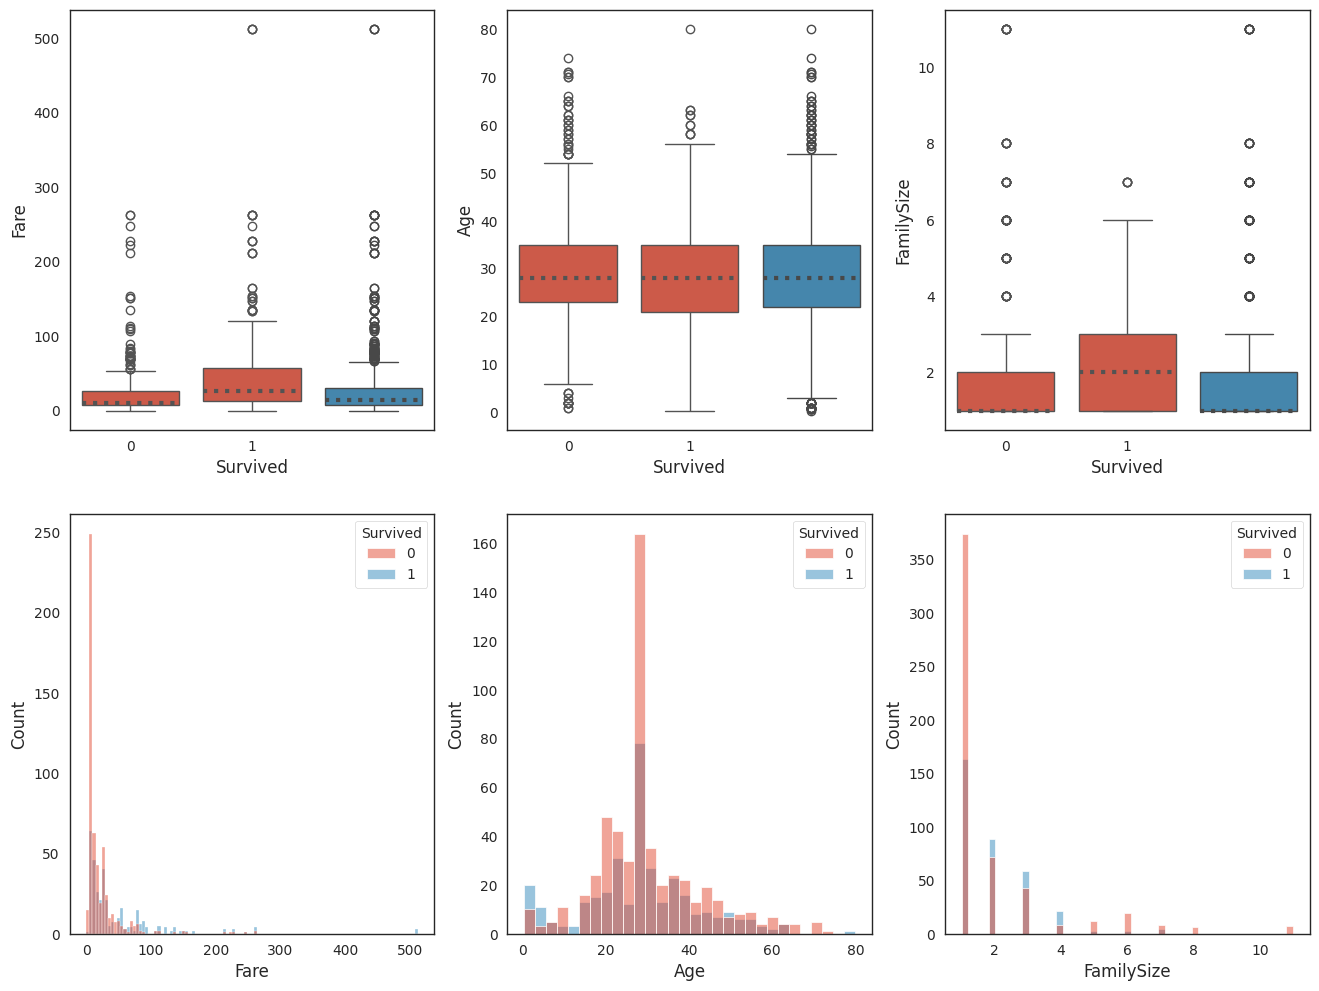

In [12]:
# Then we do distribution plots

def make_figure_distribution(df, features, target):
    fig, axs = plt.subplots(ncols=len(features), nrows=2, figsize=[16,12])
    for i in range(len(features)):
        feature = features[i]
        sns.boxplot(df, x=target, y = feature, ax=axs[0, i], medianprops={'ls': ':', 'lw': 3})
        sns.boxplot(df, y = feature, ax=axs[0, i], medianprops={'ls': ':', 'lw': 3})
        sns.histplot(df, x=feature, hue=target, ax=axs[1,i])
make_figure_distribution(data1, ["Fare", "Age", "FamilySize"], target[0])

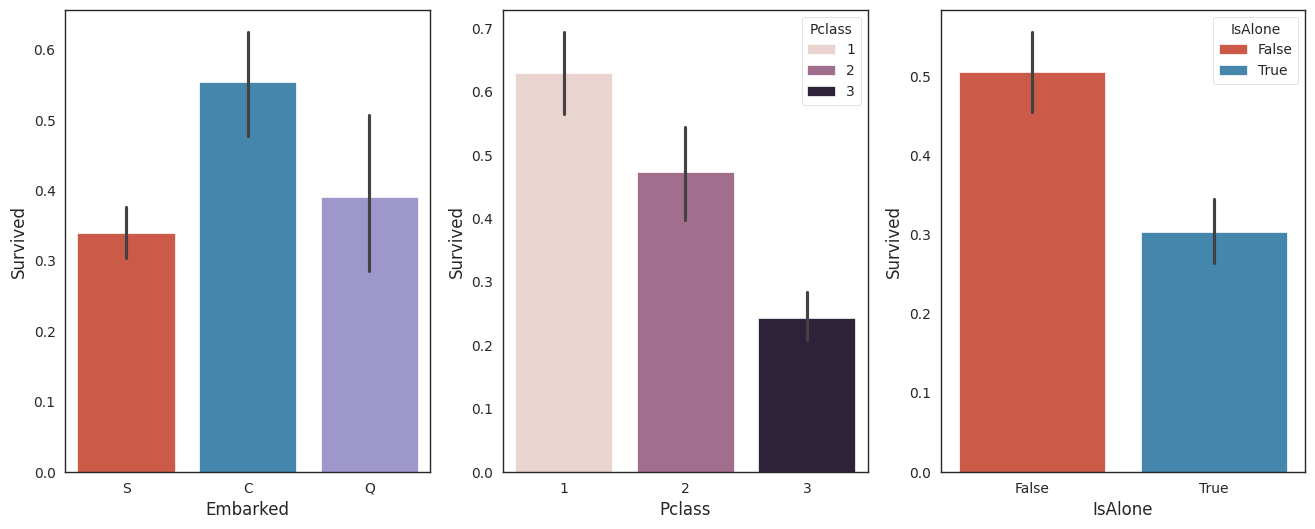

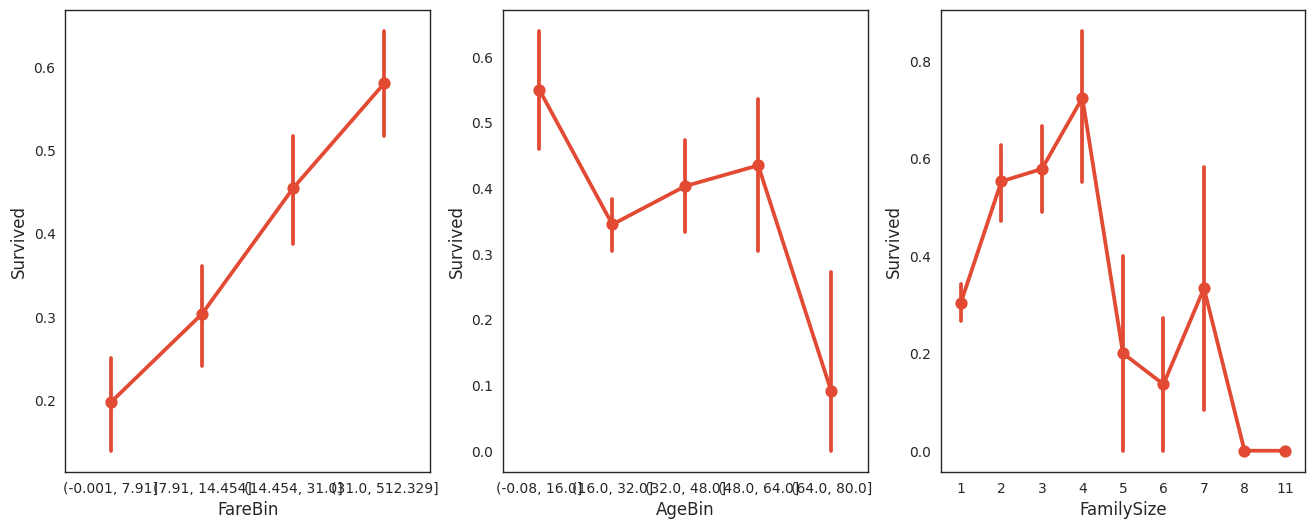

In [13]:
# Next we do multivariable comparison

def make_figure_multilabels(df, target, features):
    fig, axs = plt.subplots(ncols=len(features), nrows=1, figsize=[16,6])
    for i in range(len(features)):
        feature = features[i]
        sns.barplot(df, y=target, x = feature, hue=feature, ax=axs[i])
        
def make_figure_bins(df, target, features):
    fig, axs = plt.subplots(ncols=len(features), nrows=1, figsize=[16,6])
    for i in range(len(features)):
        feature = features[i]
        sns.pointplot(df, y=target, x = feature, ax=axs[i])
        
make_figure_multilabels(data1, target[0], ["Embarked", "Pclass", "IsAlone"])
make_figure_bins(data1, target[0], ["FareBin", "AgeBin", "FamilySize"])

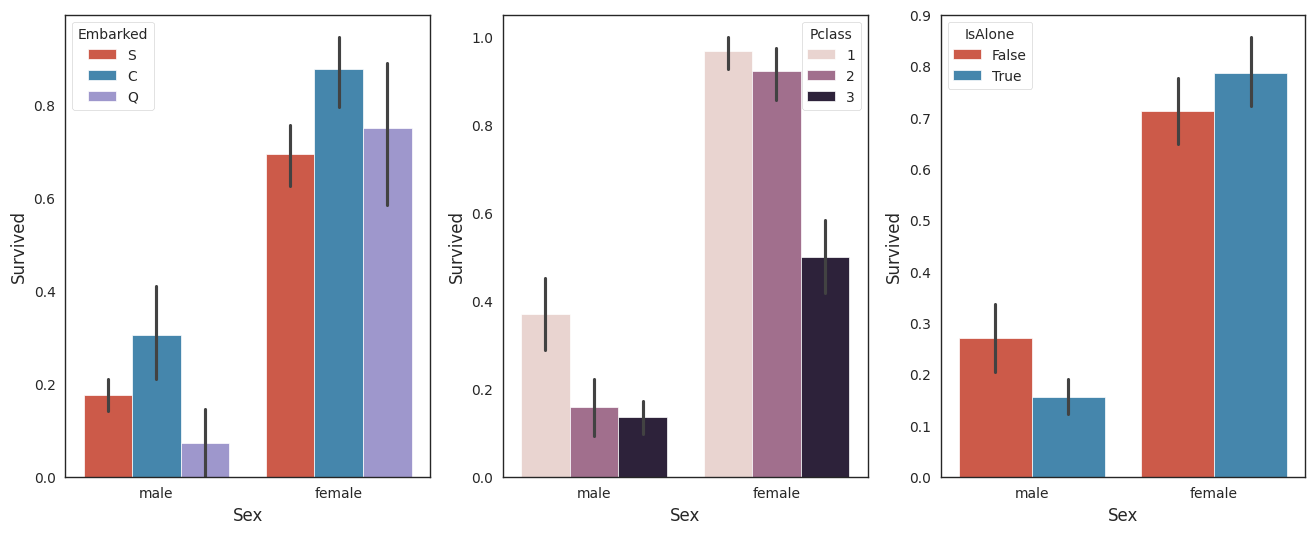

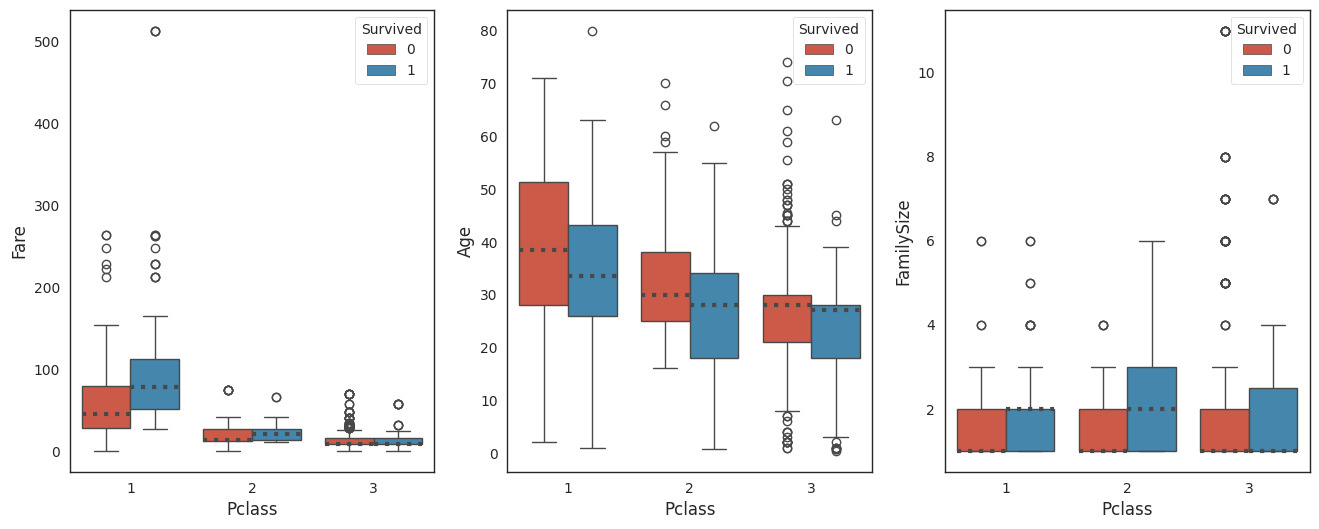

In [14]:
# Now we compare qualitative class with numerical ones

def make_figure_compare_qual_num(df, feature1, features, target):
    fig, axs = plt.subplots(ncols=len(features), nrows=1, figsize=[16,6])
    for i in range(len(features)):
        feature = features[i]
        sns.boxplot(df, y=feature, x = feature1, hue=target, ax=axs[i], medianprops={'ls': ':', 'lw': 3})
        
def make_figure_compare_qual_qual(df, feature1, features, target):
    fig, axs = plt.subplots(ncols=len(features), nrows=1, figsize=[16,6])
    for i in range(len(features)):
        feature = features[i]
        sns.barplot(df, y=target, x = feature1, hue=feature, ax=axs[i])

make_figure_compare_qual_qual(data1, "Sex", ["Embarked", "Pclass", "IsAlone"], target[0])

make_figure_compare_qual_num(data1, "Pclass", ["Fare", "Age", "FamilySize"], target[0])

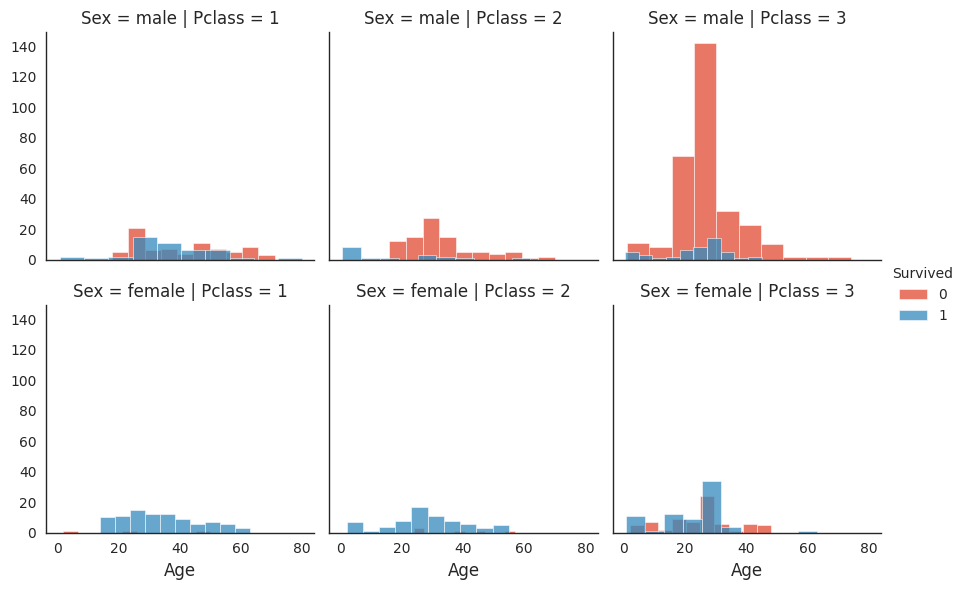

In [15]:
# We can also do 3-fold comparisons
def make_threefold_comparison(df, row_feature,  col_feature, target):
    h = sns.FacetGrid(df, row = row_feature, col = col_feature, hue = target)
    h.map(plt.hist, "Age", alpha = 0.75)
    h.add_legend()
    
make_threefold_comparison(data1, "Sex", "Pclass", target[0])
    

In [16]:
# Very useful -- pair plots of the entire dataset
def make_pair_plot(df, target):
    pp = sns.pairplot(df, hue = target, palette = 'deep', height=1.2, diag_kind = 'kde', diag_kws=dict(fill=True), plot_kws=dict(s=10) )
    pp.set(xticklabels=[])
    
# make_pair_plot(data1[features_original_coded + target], target[0])

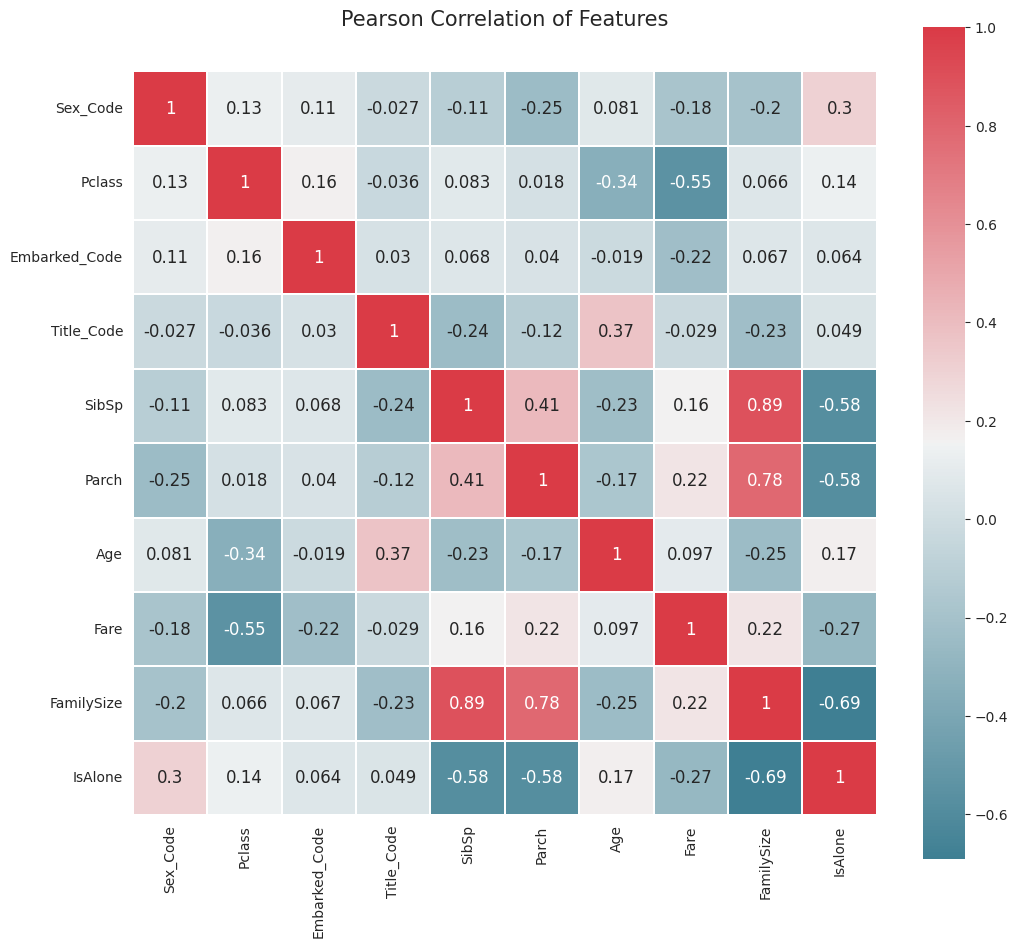

In [17]:
#correlation heatmap of dataset
def correlation_heatmap(df, figsize=(12,12)):
    _ , ax = plt.subplots(figsize = figsize)
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1[features_original_coded])



## Model data

In this section, we define various ML models and compare them

In [ ]:
# Cross-test split the data (10 samples, 30% test, 60% train, 10% left out)
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0)

In [18]:
def create_comparison_alg():
    MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
    return pd.DataFrame(columns = MLA_columns)
# Handy function to test a given ML algorithm
def run_alg_cv(alg, X, y, cv):
    MLA_compare = create_comparison_alg()
    #set name and parameters
    MLA_name = alg.__class__.__name__
    print(f"Evaluating algorithm {MLA_name}")
    MLA_compare.loc[0, 'MLA Name'] = MLA_name
    MLA_compare.loc[0, 'MLA Parameters'] = str(alg.get_params())
    
    # Test the algorithm on the cross-validation dataset
    cv_results = model_selection.cross_validate(alg, X, y, cv  = cv, return_train_score=True)
    # Store results
    MLA_compare.loc[0, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[0, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[0, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    MLA_compare.loc[0, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    
    # Keep a copy of the predictions
    alg.fit(X, y)
    MLA_predict = pd.DataFrame(alg.predict(X), index=y.index, columns=[MLA_name])
    
    return MLA_compare, MLA_predict

# Applies the previous helper function to a list of algorithms
def run_all_algs(list_alg, X, y, cv):
    output_per_alg = [run_alg_cv(alg, X, y, cv) for alg in list_alg]
    MLA_compare = pd.concat([out1 for out1,out2 in output_per_alg], axis=0)
    MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
    MLA_compare = MLA_compare.reset_index().drop("index", axis=1)
    
    y_compare = pd.concat([y] + [out2 for out1, out2 in output_per_alg], axis=1)
    
    return MLA_compare, y_compare
    
    
    

In [19]:
# Define various models
MLA = [
    # Ensemble methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    # Gaussian process
    gaussian_process.GaussianProcessClassifier(),
    
    # Linear model
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # Naive Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    xgb.XGBClassifier(),
    lgbm.LGBMClassifier(),
    catboost.CatBoostClassifier(),
]

MLA_compare, y_compare = run_all_algs(MLA, data1[features_bin_coded], data1[target], cv_split)

Evaluating algorithm AdaBoostClassifier


/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated

/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated

Evaluating algorithm BaggingClassifier


/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:782: DataConversionWarning: A column-vector y was passed w

Evaluating algorithm ExtraTreesClassifier


/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 

Evaluating algorithm GradientBoostingClassifier


/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y 

Evaluating algorithm RandomForestClassifier


/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 

Evaluating algorithm GaussianProcessClassifier


/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed w

Evaluating algorithm LogisticRegressionCV


/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed w

Evaluating algorithm PassiveAggressiveClassifier
Evaluating algorithm RidgeClassifierCV


/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed w

Evaluating algorithm SGDClassifier


/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed w

Evaluating algorithm Perceptron
Evaluating algorithm BernoulliNB


/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed w

Evaluating algorithm GaussianNB
Evaluating algorithm KNeighborsClassifier


/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was pas

Evaluating algorithm SVC


/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed w

Evaluating algorithm NuSVC


/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed w

Evaluating algorithm LinearSVC


/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, 

Evaluating algorithm DecisionTreeClassifier
Evaluating algorithm ExtraTreeClassifier
Evaluating algorithm LinearDiscriminantAnalysis
Evaluating algorithm QuadraticDiscriminantAnalysis


/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed w

Evaluating algorithm XGBClassifier
Evaluating algorithm LGBMClassifier
[LightGBM] [Info] Number of positive: 200, number of negative: 334
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 48
[LightGBM] [Info] Number of data points in the train set: 534, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374532 -> initscore=-0.512824
[LightGBM] [Info] Start training from score -0.512824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nchagnet/pyenvs/kaggle_py/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


10:	learn: 0.6455090	total: 55.6ms	remaining: 5s
11:	learn: 0.6415986	total: 56.4ms	remaining: 4.64s
12:	learn: 0.6371562	total: 57ms	remaining: 4.33s
13:	learn: 0.6335995	total: 57.6ms	remaining: 4.05s
14:	learn: 0.6297421	total: 58.3ms	remaining: 3.83s
15:	learn: 0.6258206	total: 59ms	remaining: 3.63s
16:	learn: 0.6217040	total: 59.9ms	remaining: 3.46s
17:	learn: 0.6175759	total: 60.6ms	remaining: 3.3s
18:	learn: 0.6140325	total: 61.2ms	remaining: 3.16s
19:	learn: 0.6101328	total: 62.3ms	remaining: 3.05s
20:	learn: 0.6063787	total: 62.9ms	remaining: 2.93s
21:	learn: 0.6025858	total: 63.5ms	remaining: 2.82s
22:	learn: 0.5997261	total: 64.1ms	remaining: 2.72s
23:	learn: 0.5957236	total: 65ms	remaining: 2.64s
24:	learn: 0.5921355	total: 66.1ms	remaining: 2.58s
25:	learn: 0.5882605	total: 67ms	remaining: 2.51s
26:	learn: 0.5851855	total: 67.6ms	remaining: 2.44s
27:	learn: 0.5816811	total: 68.3ms	remaining: 2.37s
28:	learn: 0.5799732	total: 68.7ms	remaining: 2.3s
29:	learn: 0.5775178	tota

Here is the part where we take a step back and think critically about these results. First we need to compare this to baseline accuracy given by the survival rate (how wrong would we be if we guessed everyone survived or everyone died).

In [20]:
baseline_accuracy = ((data1[target] == 1).sum() / (data1[target] == 1).size).iloc[0]
baseline_accuracy = max(baseline_accuracy, 1.0 - baseline_accuracy) # We compare the two uniform strategies
print(f"The baseline accuracy is {baseline_accuracy}")

The baseline accuracy is 0.6161616161616161


All the previous models outperform this basic strategy which is reassuring.

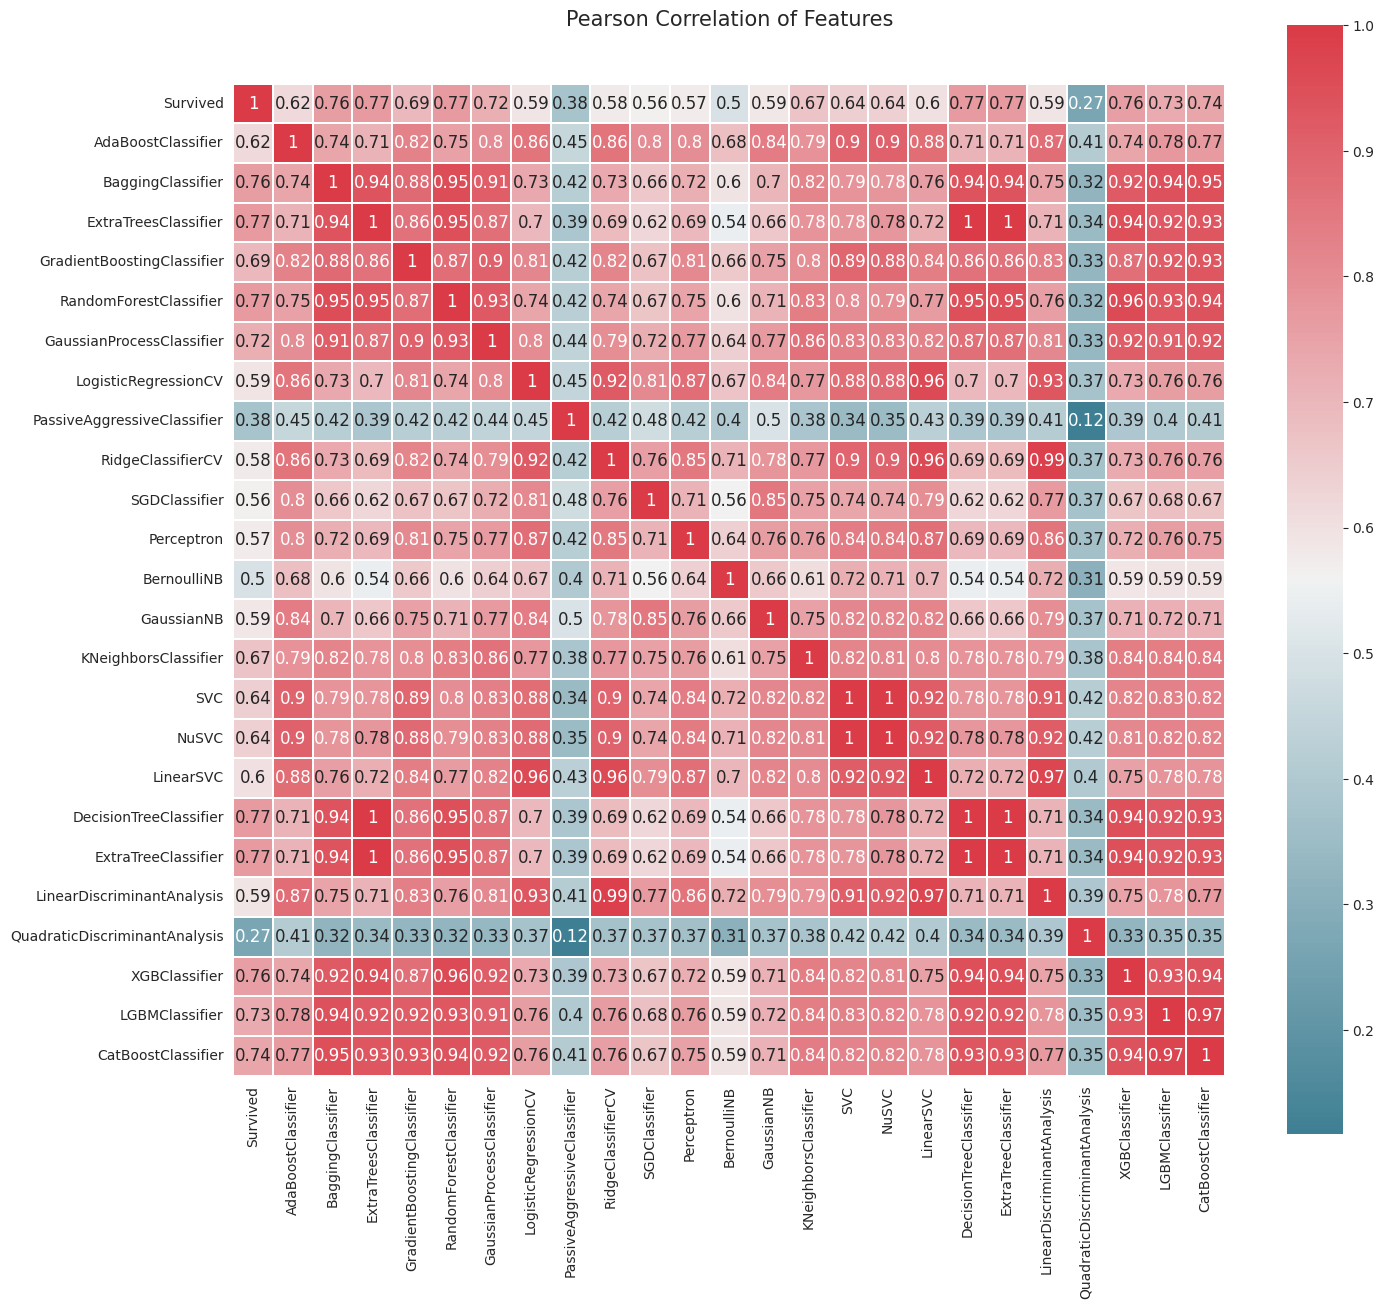

In [21]:
# Compare all predictions of the different algorithms together
correlation_heatmap(y_compare, figsize=(16,16))

## Model tuning

We will choose one of the top scoring models and tune its hyperparameters.

#### Hyperparameters

In [22]:
def tune_model_hyperparameters(X, y, cv, model_ref, param_grid, scoring="roc_auc"):
    # Define the model
    model = model_ref(random_state=0)
    base_results = model_selection.cross_validate(model, X, y, cv=cv, return_train_score=True)
    model.fit(X, y)

    print("BEFORE model Parameters: ", model.get_params())
    print("BEFORE model Training score mean: {:.5f}".format(base_results["train_score"].mean()))
    print("BEFORE model Test score mean: {:.5f}".format(base_results["test_score"].mean()))
    print("BEFORE model Test score 3*std: +/- {:.5f}".format(base_results["test_score"].std() * 3))
    print("-" * 10)

    # Define a parameter grid
    param_grid["random_state"] = [0]

    tune_model = model_selection.GridSearchCV(
        model_ref(), param_grid=param_grid, scoring=scoring, cv=cv, return_train_score=True
    )
    tune_model.fit(X, y)
    print("AFTER model Parameters: ", tune_model.best_params_)
    # print(tune_model.cv_results_['mean_train_score'])
    print(
        "AFTER model Training score mean: {:.5f}".format(
            tune_model.cv_results_["mean_train_score"][tune_model.best_index_]
        )
    )
    # print(tune_model.cv_results_['mean_test_score'])
    print(
        "AFTER model Test score mean: {:.5f}".format(
            tune_model.cv_results_["mean_test_score"][tune_model.best_index_]
        )
    )
    print(
        "AFTER model Test score 3*std: +/- {:.5f}".format(
            tune_model.cv_results_["std_test_score"][tune_model.best_index_] * 3
        )
    )
    print("-" * 10)
    return tune_model

In [23]:
# Define a parameter grid
param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6,8,10,None]}

result_tuning_hyperparameters = tune_model_hyperparameters(
    data1[features_bin_coded], data1[target].to_numpy().ravel(), cv_split, tree.DecisionTreeClassifier, param_grid
)

BEFORE model Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}
BEFORE model Training score mean: 90.02
BEFORE model Test score mean: 81.34
BEFORE model Test score 3*std: +/- 6.13
----------


AFTER model Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER model Training score mean: 89.33
AFTER model Test score mean: 87.46
AFTER model Test score 3*std: +/- 5.00
----------


In [24]:
# Define a parameter grid
param_grid = {'learning_rate': [.01, .03, .05, .1, .25], 
              'n_estimators': [10, 50, 100, 300],
              "max_depth": [1,2,4,6,8,10],
}

result_tuning_hyperparameters = tune_model_hyperparameters(
    data1[features_bin_coded], data1[target], cv_split, xgb.XGBClassifier, param_grid
)

BEFORE model Parameters:  {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 0, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
BEFORE model Training score mean: 89.57
BEFORE model Test score mean: 82.65
B

#### Feature selection

In [25]:
def tune_model_rfe_hyperparameters(X, y, cv, model_ref, param_grid, scoring="accuracy"):
    # Define the model
    model = model_ref(random_state=0)
    base_results = model_selection.cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=True)
    model.fit(X, y)
    
    #base model
    print('BEFORE model RFE Training Shape Old: ', X.shape) 
    print('BEFORE model RFE Training Columns Old: ', X.columns.values)

    print("BEFORE model RFE Training score mean: {:.5f}". format(base_results['train_score'].mean())) 
    print("BEFORE model RFE Test score mean: {:.5f}". format(base_results['test_score'].mean()))
    print("BEFORE model RFE Test score 3*std: +/- {:.5f}". format(base_results['test_score'].std()*3))
    print('-'*10)

    #feature selection
    model_rfe = feature_selection.RFECV(model, step = 1,scoring=scoring, cv = cv)
    model_rfe.fit(X, y)

    #transform x&y to reduced features and fit new model
    #alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
    features_rfe = list(X.columns[model_rfe.get_support()])
    X_rfe = X[features_rfe]
    rfe_results = model_selection.cross_validate(model, X, y, cv  = cv,scoring=scoring, return_train_score=True)

    #print(dtree_rfe.grid_scores_)
    print('AFTER model RFE Training Shape New: ', X_rfe.shape) 
    print('AFTER model RFE Training Columns New: ', features_rfe)

    print("AFTER model RFE Training score mean: {:.5f}". format(rfe_results['train_score'].mean())) 
    print("AFTER model RFE Test score mean: {:.5f}". format(rfe_results['test_score'].mean()))
    print("AFTER model RFE Test score 3*std: +/- {:.5f}". format(rfe_results['test_score'].std()*3))
    print('-'*10)

    #tune rfe model
    param_grid["random_state"] = [0]
    rfe_tune_model = model_selection.GridSearchCV(model_ref(), param_grid=param_grid, scoring=scoring, cv = cv, return_train_score=True)
    rfe_tune_model.fit(X_rfe, y)

    #print(rfe_tune_model.cv_results_.keys())
    #print(rfe_tune_model.cv_results_['params'])
    print('AFTER model RFE Tuned Parameters: ', rfe_tune_model.best_params_)
    #print(rfe_tune_model.cv_results_['mean_train_score'])
    print("AFTER model RFE Tuned Training score mean: {:.5f}". format(rfe_tune_model.cv_results_['mean_train_score'][rfe_tune_model.best_index_])) 
    #print(rfe_tune_model.cv_results_['mean_test_score'])
    print("AFTER model RFE Tuned Test score mean: {:.5f}". format(rfe_tune_model.cv_results_['mean_test_score'][rfe_tune_model.best_index_]))
    print("AFTER model RFE Tuned Test score 3*std: +/- {:.5f}". format(rfe_tune_model.cv_results_['std_test_score'][rfe_tune_model.best_index_]*3))
    print('-'*10)


    return rfe_tune_model, features_rfe

In [26]:
# Define a parameter grid
param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6,8,10,None]}

result_tuning_rfe_hyperparameters, features_rfe = tune_model_rfe_hyperparameters(
    data1[features_bin_coded], data1[target].to_numpy().ravel(), cv_split, tree.DecisionTreeClassifier, param_grid
)

BEFORE model RFE Training Shape Old:  (891, 10)
BEFORE model RFE Training Columns Old:  ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'SibSp' 'Parch'
 'AgeBin_Code' 'FareBin_Code' 'FamilySize' 'IsAlone']
BEFORE model RFE Training score mean: 90.02
BEFORE model RFE Test score mean: 81.34
BEFORE model RFE Test score 3*std: +/- 6.13
----------


AFTER model RFE Training Shape New:  (891, 7)
AFTER model RFE Training Columns New:  ['Sex_Code', 'Pclass', 'Title_Code', 'SibSp', 'AgeBin_Code', 'FareBin_Code', 'FamilySize']
AFTER model RFE Training score mean: 90.02
AFTER model RFE Test score mean: 81.34
AFTER model RFE Test score 3*std: +/- 6.13
----------
AFTER model RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER model RFE Tuned Training score mean: 89.39
AFTER model RFE Tuned Test score mean: 87.39
AFTER model RFE Tuned Test score 3*std: +/- 5.98
----------


In [27]:
# Define a parameter grid
param_grid = {'learning_rate': [.01, .03, .05, .1, .25], 
              'n_estimators': [10, 50, 100, 300],
              "max_depth": [1,2,4,6,8,10],
}

result_tuning_rfe_hyperparameters, features_rfe = tune_model_rfe_hyperparameters(
    data1[features_bin_coded], data1[target], cv_split, xgb.XGBClassifier, param_grid
)

BEFORE model RFE Training Shape Old:  (891, 10)
BEFORE model RFE Training Columns Old:  ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'SibSp' 'Parch'
 'AgeBin_Code' 'FareBin_Code' 'FamilySize' 'IsAlone']
BEFORE model RFE Training score mean: 89.57
BEFORE model RFE Test score mean: 82.65
BEFORE model RFE Test score 3*std: +/- 5.99
----------
AFTER model RFE Training Shape New:  (891, 9)
AFTER model RFE Training Columns New:  ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'SibSp', 'Parch', 'AgeBin_Code', 'FareBin_Code', 'FamilySize']
AFTER model RFE Training score mean: 89.57
AFTER model RFE Test score mean: 82.65
AFTER model RFE Test score 3*std: +/- 5.99
----------
AFTER model RFE Tuned Parameters:  {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100, 'random_state': 0}
AFTER model RFE Tuned Training score mean: 89.32
AFTER model RFE Tuned Test score mean: 88.18
AFTER model RFE Tuned Test score 3*std: +/- 6.24
----------


## Validation

After choosing an algorithm and tuning it, we can evaluate it on the test dataset and submit it.

In [33]:
data_val1["Survived"] = result_tuning_rfe_hyperparameters.predict(data_val1[features_rfe])

In [35]:
submit = pd.concat([data_val_raw['PassengerId'], data_val1['Survived']], axis=1)
submit.to_csv("Titanic Disaster/submit_framework.csv", index=False)